# Azure Face API Demo

<img src="https://docs.microsoft.com/ja-jp/azure/cognitive-services/face/images/landmarks.1.jpg">

In [1]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [2]:
from datetime import datetime
now = datetime.now()
print(now)

2021-10-20 12:00:18.626080


In [3]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
import os
import requests
import matplotlib.pyplot as plt
from matplotlib import patches
import cv2
import pandas as pd
import urllib

In [4]:
image_url = 'https://github.com/retkowsky/AzureCognitiveServicesFaceAPI/blob/main/images/face%20(1).jpg?raw=true'
image_file = 'test1.jpg'
urllib.request.urlretrieve(image_url, filename=image_file)

('test1.jpg', <http.client.HTTPMessage at 0x7f4613727fd0>)

In [5]:
image = cv2.imread(image_file)
h, w, c = image.shape
print('Width:', w)
print('Height:', h)
print('Channel:', c)
print('Size:', image.size)

Width: 1024
Height: 1024
Channel: 3
Size: 3145728


In [6]:
def imageview(imagename):
    plt.figure(figsize=(15, 15))
    image_rgb = cv2.cvtColor(imagename, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)

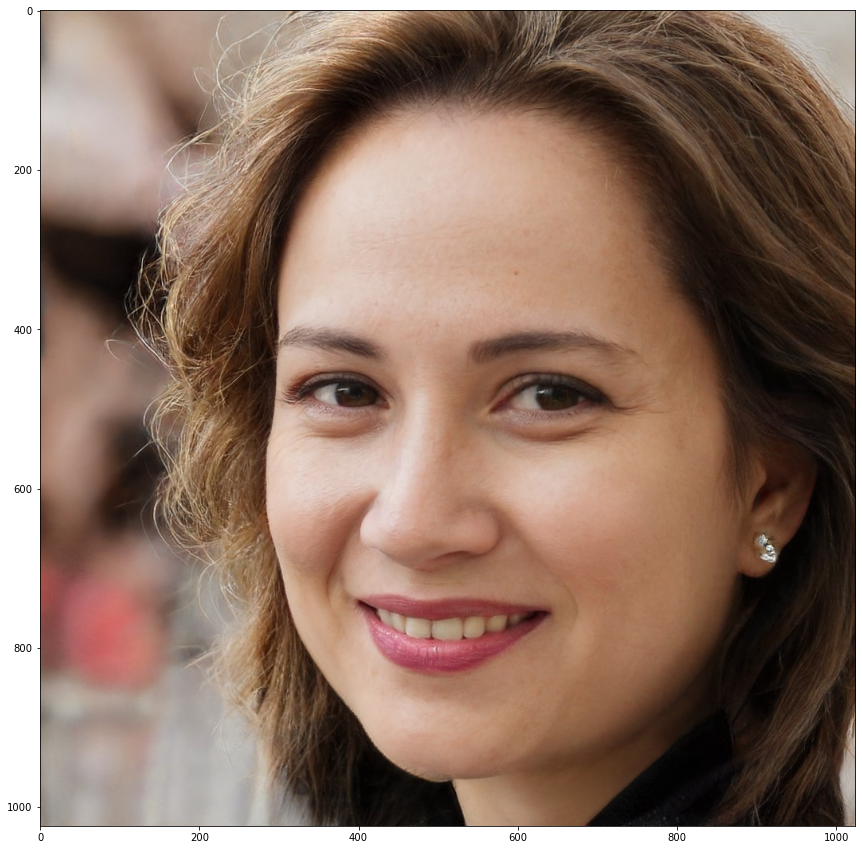

In [7]:
imageview(image)

## Face API

In [8]:
faceapi_key = 'yourkey'
faceapi_endpoint = 'yourendpoint'

In [9]:
face_client = FaceClient(faceapi_endpoint, CognitiveServicesCredentials(faceapi_key))

In [10]:
faceimage = open(image_file, 'rb')
face_api_url = faceapi_endpoint + "face/v1.0/detect"
headers = {'Content-Type': 'application/octet-stream',
'Ocp-Apim-Subscription-Key': faceapi_key}

params = {
'returnFaceId': 'true',
'returnFaceLandmarks': 'true',
'returnFaceAttributes' : 'age, gender, headPose, smile, facialHair, glasses, emotion, hair, makeup, occlusion, accessories, blur, exposure, noise',
'recognitionModel': 'recognition_04'
}

response = requests.post(face_api_url, params=params, headers=headers, data=faceimage)
response.raise_for_status()
faces = response.json()

In [11]:
faces

[{'faceId': 'b3e1e564-a93b-43ae-b2a1-960ab3d6eba8',
  'faceRectangle': {'top': 327, 'left': 217, 'width': 583, 'height': 583},
  'faceLandmarks': {'pupilLeft': {'x': 399.7, 'y': 479.6},
   'pupilRight': {'x': 652.2, 'y': 484.9},
   'noseTip': {'x': 463.6, 'y': 657.9},
   'mouthLeft': {'x': 392.7, 'y': 744.1},
   'mouthRight': {'x': 637.7, 'y': 756.9},
   'eyebrowLeftOuter': {'x': 292.8, 'y': 412.6},
   'eyebrowLeftInner': {'x': 429.2, 'y': 430.2},
   'eyeLeftOuter': {'x': 344.8, 'y': 482.8},
   'eyeLeftTop': {'x': 386.2, 'y': 465.2},
   'eyeLeftBottom': {'x': 382.1, 'y': 499.2},
   'eyeLeftInner': {'x': 424.6, 'y': 490.8},
   'eyebrowRightInner': {'x': 541.8, 'y': 432.7},
   'eyebrowRightOuter': {'x': 750.5, 'y': 431.0},
   'eyeRightInner': {'x': 591.8, 'y': 493.5},
   'eyeRightTop': {'x': 639.4, 'y': 469.1},
   'eyeRightBottom': {'x': 641.6, 'y': 504.7},
   'eyeRightOuter': {'x': 688.6, 'y': 486.9},
   'noseRootLeft': {'x': 456.7, 'y': 495.5},
   'noseRootRight': {'x': 534.1, 'y': 496

## Face ID

In [12]:
for face in faces:
    faceid = face['faceId']
faceid

'b3e1e564-a93b-43ae-b2a1-960ab3d6eba8'

## ROI

In [13]:
for face in faces:
    faceRectangle = face['faceRectangle']
faceRectangle

{'top': 327, 'left': 217, 'width': 583, 'height': 583}

In [14]:
for face in faces:
    top = face['faceRectangle']['top']
    left = face['faceRectangle']['left']
    width = face['faceRectangle']['width']
    height = face['faceRectangle']['height']

top, left, width, height

(327, 217, 583, 583)

## Face Attributes

In [15]:
for face in faces:
    faceAttributes = face['faceAttributes']
faceAttributes

{'smile': 1.0,
 'headPose': {'pitch': -8.4, 'roll': 1.2, 'yaw': -18.4},
 'gender': 'female',
 'age': 32.0,
 'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
 'glasses': 'NoGlasses',
 'emotion': {'anger': 0.0,
  'contempt': 0.0,
  'disgust': 0.0,
  'fear': 0.0,
  'happiness': 1.0,
  'neutral': 0.0,
  'sadness': 0.0,
  'surprise': 0.0},
 'blur': {'blurLevel': 'low', 'value': 0.0},
 'exposure': {'exposureLevel': 'goodExposure', 'value': 0.63},
 'noise': {'noiseLevel': 'low', 'value': 0.0},
 'makeup': {'eyeMakeup': True, 'lipMakeup': True},
 'accessories': [],
 'occlusion': {'foreheadOccluded': False,
  'eyeOccluded': False,
  'mouthOccluded': False},
 'hair': {'bald': 0.03,
  'invisible': False,
  'hairColor': [{'color': 'brown', 'confidence': 1.0},
   {'color': 'black', 'confidence': 0.72},
   {'color': 'red', 'confidence': 0.34},
   {'color': 'blond', 'confidence': 0.31},
   {'color': 'gray', 'confidence': 0.05},
   {'color': 'other', 'confidence': 0.05},
   {'color': '

## Smile

In [16]:
for face in faces:
    smile = face['faceAttributes']['smile']
smile

1.0

## Facial Hair

In [17]:
for face in faces:
    facialHair = face['faceAttributes']['facialHair']
facialHair

{'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0}

## MakeUp

In [18]:
for face in faces:
    makeup = face['faceAttributes']['makeup']
makeup

{'eyeMakeup': True, 'lipMakeup': True}

## Accessories

In [19]:
for face in faces:
    accessories = face['faceAttributes']['accessories']
accessories

[]

## Occlusion

In [20]:
for face in faces:
    occlusion = face['faceAttributes']['occlusion']
occlusion

{'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}

## Head Pose

In [21]:
for face in faces:
    headPose = face['faceAttributes']['headPose']
headPose

{'pitch': -8.4, 'roll': 1.2, 'yaw': -18.4}

## Blur

In [22]:
for face in faces:
    blur = face['faceAttributes']['blur']
blur

{'blurLevel': 'low', 'value': 0.0}

## Exposure

In [23]:
for face in faces:
    exposure = face['faceAttributes']['exposure']
exposure

{'exposureLevel': 'goodExposure', 'value': 0.63}

## Noise

In [24]:
for face in faces:
    noise = face['faceAttributes']['noise']
noise

{'noiseLevel': 'low', 'value': 0.0}

## Age

In [25]:
for face in faces:
    age = face['faceAttributes']['age']
age

32.0

## Gender

In [26]:
for face in faces:
    gender = face['faceAttributes']['gender']
gender

'female'

## Glasses

In [27]:
for face in faces:
    glasses = face['faceAttributes']['glasses']
glasses

'NoGlasses'

## Landmarks

In [28]:
for face in faces:
    faceLandmarks = face['faceLandmarks']
faceLandmarks

{'pupilLeft': {'x': 399.7, 'y': 479.6},
 'pupilRight': {'x': 652.2, 'y': 484.9},
 'noseTip': {'x': 463.6, 'y': 657.9},
 'mouthLeft': {'x': 392.7, 'y': 744.1},
 'mouthRight': {'x': 637.7, 'y': 756.9},
 'eyebrowLeftOuter': {'x': 292.8, 'y': 412.6},
 'eyebrowLeftInner': {'x': 429.2, 'y': 430.2},
 'eyeLeftOuter': {'x': 344.8, 'y': 482.8},
 'eyeLeftTop': {'x': 386.2, 'y': 465.2},
 'eyeLeftBottom': {'x': 382.1, 'y': 499.2},
 'eyeLeftInner': {'x': 424.6, 'y': 490.8},
 'eyebrowRightInner': {'x': 541.8, 'y': 432.7},
 'eyebrowRightOuter': {'x': 750.5, 'y': 431.0},
 'eyeRightInner': {'x': 591.8, 'y': 493.5},
 'eyeRightTop': {'x': 639.4, 'y': 469.1},
 'eyeRightBottom': {'x': 641.6, 'y': 504.7},
 'eyeRightOuter': {'x': 688.6, 'y': 486.9},
 'noseRootLeft': {'x': 456.7, 'y': 495.5},
 'noseRootRight': {'x': 534.1, 'y': 496.7},
 'noseLeftAlarTop': {'x': 427.1, 'y': 604.5},
 'noseRightAlarTop': {'x': 549.3, 'y': 607.4},
 'noseLeftAlarOutTip': {'x': 398.0, 'y': 652.3},
 'noseRightAlarOutTip': {'x': 577.4

In [29]:
for face in faces:
    faceLandmarks = face['faceLandmarks']
    pupilLeftx =  face['faceLandmarks']['pupilLeft']['x']
    pupilRightx =  face['faceLandmarks']['pupilRight']['x']
    noseTipx =  face['faceLandmarks']['noseTip']['x']
    mouthLeftx =  face['faceLandmarks']['mouthLeft']['x']
    mouthRightx =  face['faceLandmarks']['mouthRight']['x']
    eyebrowLeftOuterx =  face['faceLandmarks']['eyebrowLeftOuter']['x']
    eyebrowLeftInnerx =  face['faceLandmarks']['eyebrowLeftInner']['x']
    eyeLeftOuterx =  face['faceLandmarks']['eyeLeftOuter']['x']
    eyeLeftTopx =  face['faceLandmarks']['eyeLeftTop']['x']
    eyeLeftBottomx =  face['faceLandmarks']['eyeLeftBottom']['x']
    eyeLeftInnerx =  face['faceLandmarks']['eyeLeftInner']['x']
    eyebrowRightInnerx =  face['faceLandmarks']['eyebrowRightInner']['x']
    eyebrowRightOuterx =  face['faceLandmarks']['eyebrowRightOuter']['x']
    eyeRightInnerx =  face['faceLandmarks']['eyeRightInner']['x']
    eyeRightTopx =  face['faceLandmarks']['eyeRightTop']['x']
    eyeRightBottomx =  face['faceLandmarks']['eyeRightBottom']['x']
    eyeRightOuterx =  face['faceLandmarks']['eyeRightOuter']['x']
    noseRootLeftx =  face['faceLandmarks']['noseRootLeft']['x']
    noseRootRightx =  face['faceLandmarks']['noseRootRight']['x']
    noseLeftAlarTopx =  face['faceLandmarks']['noseLeftAlarTop']['x']
    noseRightAlarTopx =  face['faceLandmarks']['noseRightAlarTop']['x']
    noseLeftAlarOutTipx =  face['faceLandmarks']['noseLeftAlarOutTip']['x']
    noseRightAlarOutTipx =  face['faceLandmarks']['noseRightAlarOutTip']['x']
    upperLipTopx =  face['faceLandmarks']['upperLipTop']['x']
    upperLipBottomx =  face['faceLandmarks']['upperLipBottom']['x']
    underLipTopx =  face['faceLandmarks']['underLipTop']['x']
    underLipBottomx =  face['faceLandmarks']['underLipBottom']['x']

    pupilLefty =  face['faceLandmarks']['pupilLeft']['y']
    pupilRighty =  face['faceLandmarks']['pupilRight']['y']
    noseTipy =  face['faceLandmarks']['noseTip']['y']
    mouthLefty =  face['faceLandmarks']['mouthLeft']['y']
    mouthRighty =  face['faceLandmarks']['mouthRight']['y']
    eyebrowLeftOutery =  face['faceLandmarks']['eyebrowLeftOuter']['y']
    eyebrowLeftInnery =  face['faceLandmarks']['eyebrowLeftInner']['y']
    eyeLeftOutery =  face['faceLandmarks']['eyeLeftOuter']['y']
    eyeLeftTopy =  face['faceLandmarks']['eyeLeftTop']['y']
    eyeLeftBottomy =  face['faceLandmarks']['eyeLeftBottom']['y']
    eyeLeftInnery =  face['faceLandmarks']['eyeLeftInner']['y']
    eyebrowRightInnery =  face['faceLandmarks']['eyebrowRightInner']['y']
    eyebrowRightOutery =  face['faceLandmarks']['eyebrowRightOuter']['y']
    eyeRightInnery =  face['faceLandmarks']['eyeRightInner']['y']
    eyeRightTopy =  face['faceLandmarks']['eyeRightTop']['y']
    eyeRightBottomy =  face['faceLandmarks']['eyeRightBottom']['y']
    eyeRightOutery =  face['faceLandmarks']['eyeRightOuter']['y']
    noseRootLefty =  face['faceLandmarks']['noseRootLeft']['y']
    noseRootRighty =  face['faceLandmarks']['noseRootRight']['y']
    noseLeftAlarTopy =  face['faceLandmarks']['noseLeftAlarTop']['y']
    noseRightAlarTopy =  face['faceLandmarks']['noseRightAlarTop']['y']
    noseLeftAlarOutTipy =  face['faceLandmarks']['noseLeftAlarOutTip']['y']
    noseRightAlarOutTipy =  face['faceLandmarks']['noseRightAlarOutTip']['y']
    upperLipTopy =  face['faceLandmarks']['upperLipTop']['y']
    upperLipBottomy =  face['faceLandmarks']['upperLipBottom']['y']
    underLipTopy =  face['faceLandmarks']['underLipTop']['y']
    underLipBottomy =  face['faceLandmarks']['underLipBottom']['y']

## Emotions

In [30]:
for face in faces:
    emotions = face['faceAttributes']['emotion']
emotions

{'anger': 0.0,
 'contempt': 0.0,
 'disgust': 0.0,
 'fear': 0.0,
 'happiness': 1.0,
 'neutral': 0.0,
 'sadness': 0.0,
 'surprise': 0.0}

In [31]:
import operator
topsentiment = max(emotions.items(), key=operator.itemgetter(1))[0]
probtopsentiment = max(emotions.items(), key=operator.itemgetter(1))[1]
print('Sentiment =', topsentiment, 'with confidence =', probtopsentiment)

Sentiment = happiness with confidence = 1.0


## Hair Color

In [32]:
for face in faces:
    hair = face['faceAttributes']['hair']
hair

{'bald': 0.03,
 'invisible': False,
 'hairColor': [{'color': 'brown', 'confidence': 1.0},
  {'color': 'black', 'confidence': 0.72},
  {'color': 'red', 'confidence': 0.34},
  {'color': 'blond', 'confidence': 0.31},
  {'color': 'gray', 'confidence': 0.05},
  {'color': 'other', 'confidence': 0.05},
  {'color': 'white', 'confidence': 0.0}]}

In [33]:
for face in faces:
    haircolor = face['faceAttributes']['hair']['hairColor']
haircolor

[{'color': 'brown', 'confidence': 1.0},
 {'color': 'black', 'confidence': 0.72},
 {'color': 'red', 'confidence': 0.34},
 {'color': 'blond', 'confidence': 0.31},
 {'color': 'gray', 'confidence': 0.05},
 {'color': 'other', 'confidence': 0.05},
 {'color': 'white', 'confidence': 0.0}]

## Results

In [34]:
imagefaceapi = image.copy()

In [35]:
print(imagefaceapi.shape)
h, w, c = imagefaceapi.shape

(1024, 1024, 3)


In [36]:
result_image = cv2.rectangle(imagefaceapi, (left, top), (left + width, top + height), (0, 255, 0), 3)
msg1 ='ID:' + str(faceid)
result_image = cv2.putText(result_image, msg1, (100, 200), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 1, cv2.LINE_AA)
cv2.imwrite("AzureFaceResults1.jpg", result_image)

True

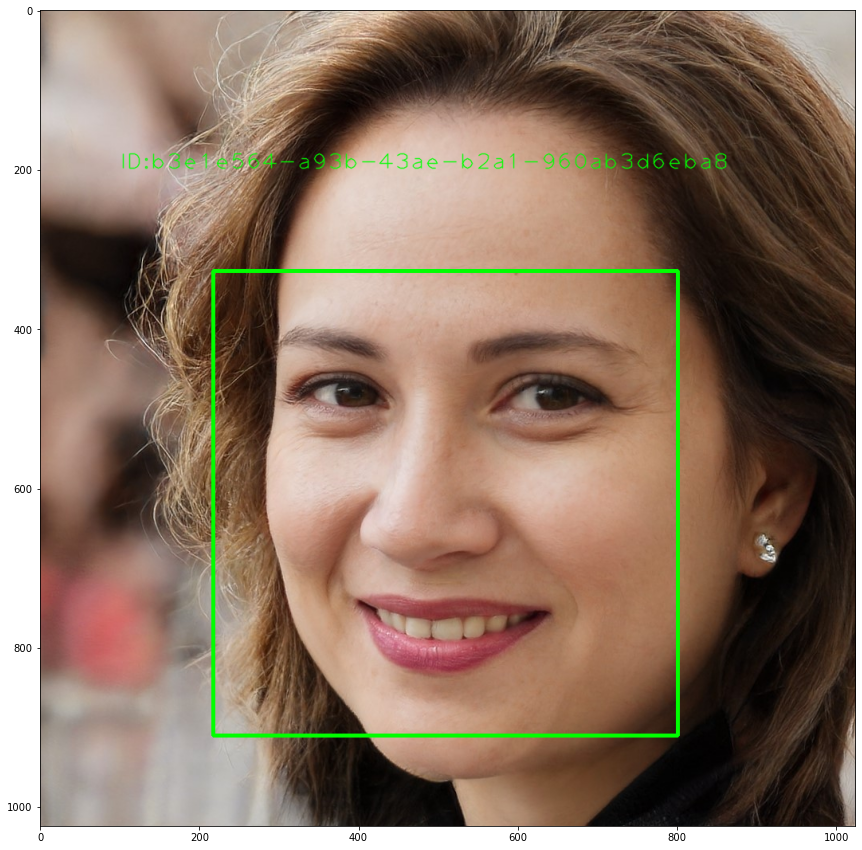

In [37]:
imageview(result_image)

In [38]:
sizecircle=2
colorcircle=(0, 255, 0)
coloreye=(0,0,255)
colornose=(255,0,0)
colormouth=(0,165,255)

In [39]:
pupilLeft = cv2.circle(result_image, (int(pupilLeftx), int(pupilLefty)), 2, coloreye, sizecircle)
pupilRight = cv2.circle(result_image, (int(pupilRightx), int(pupilRighty)), 2, coloreye, sizecircle)
noseTip = cv2.circle(result_image, (int(noseTipx), int(noseTipy)), 2, colornose, sizecircle)
mouthLeft = cv2.circle(result_image, (int(mouthLeftx), int(mouthLefty)), 2, colormouth, sizecircle)
mouthRight = cv2.circle(result_image, (int(mouthRightx), int(mouthRighty)), 2, colormouth, sizecircle)
eyebrowLeftOuter = cv2.circle(result_image, (int(eyebrowLeftOuterx), int(eyebrowLeftOutery)), 2, colorcircle, sizecircle)
eyebrowLeftInner = cv2.circle(result_image, (int(eyebrowLeftInnerx), int(eyebrowLeftInnery)), 2, colorcircle, sizecircle)
eyeLeftOuter = cv2.circle(result_image, (int(eyeLeftOuterx), int(eyeLeftOutery)), 2, coloreye, sizecircle)
eyeLeftTop = cv2.circle(result_image, (int(eyeLeftTopx), int(eyeLeftTopy)), 2, coloreye, sizecircle)
eyeLeftBottom = cv2.circle(result_image, (int(eyeLeftBottomx), int(eyeLeftBottomy)), 2, coloreye, sizecircle)
eyeLeftInner = cv2.circle(result_image, (int(eyeLeftInnerx), int(eyeLeftInnery)), 2, coloreye, sizecircle)
eyebrowRightInner = cv2.circle(result_image, (int(eyebrowRightInnerx), int(eyebrowRightInnery)), 2, colorcircle, sizecircle)
eyebrowRightOuter = cv2.circle(result_image, (int(eyebrowRightOuterx), int(eyebrowRightOutery)), 2, colorcircle, sizecircle)
eyeRightInner = cv2.circle(result_image, (int(eyeRightInnerx), int(eyeRightInnery)), 2, coloreye, sizecircle)
eyeRightTop = cv2.circle(result_image, (int(eyeRightTopx), int(eyeRightTopy)), 2, coloreye, sizecircle)
eyeRightBottom = cv2.circle(result_image, (int(eyeRightBottomx), int(eyeRightBottomy)), 2, coloreye, sizecircle)
eyeRightOuter = cv2.circle(result_image, (int(eyeRightOuterx), int(eyeRightOutery)), 2, coloreye, sizecircle)
noseRootLeft = cv2.circle(result_image, (int(noseRootLeftx), int(noseRootLefty)), 2, colornose, sizecircle)
noseRootRight = cv2.circle(result_image, (int(noseRootRightx), int(noseRootRighty)), 2, colornose, sizecircle)
noseLeftAlarTop = cv2.circle(result_image, (int(noseLeftAlarTopx), int(noseLeftAlarTopy)), 2, colornose, sizecircle)
noseRightAlarTop = cv2.circle(result_image, (int(noseRightAlarTopx), int(noseRightAlarTopy)), 2, colornose, sizecircle)
noseLeftAlarOutTip = cv2.circle(result_image, (int(noseLeftAlarOutTipx), int(noseLeftAlarOutTipy)), 2, colornose, sizecircle)
noseRightAlarOutTip = cv2.circle(result_image, (int(noseRightAlarOutTipx), int(noseRightAlarOutTipy)), 2, colornose, sizecircle)
upperLipTop = cv2.circle(result_image, (int(upperLipTopx), int(upperLipTopy)), 2, colormouth, sizecircle)
upperLipBottom = cv2.circle(result_image, (int(upperLipBottomx), int(upperLipBottomy)), 2, colormouth, sizecircle)
underLipTop = cv2.circle(result_image, (int(underLipTopx), int(underLipTopy)), 2, colormouth, sizecircle)
underLipBottom = cv2.circle(result_image, (int(underLipBottomx), int(underLipBottomy)), 2, colormouth, sizecircle)

cv2.imwrite("AzureFaceResults2.jpg", result_image)

True

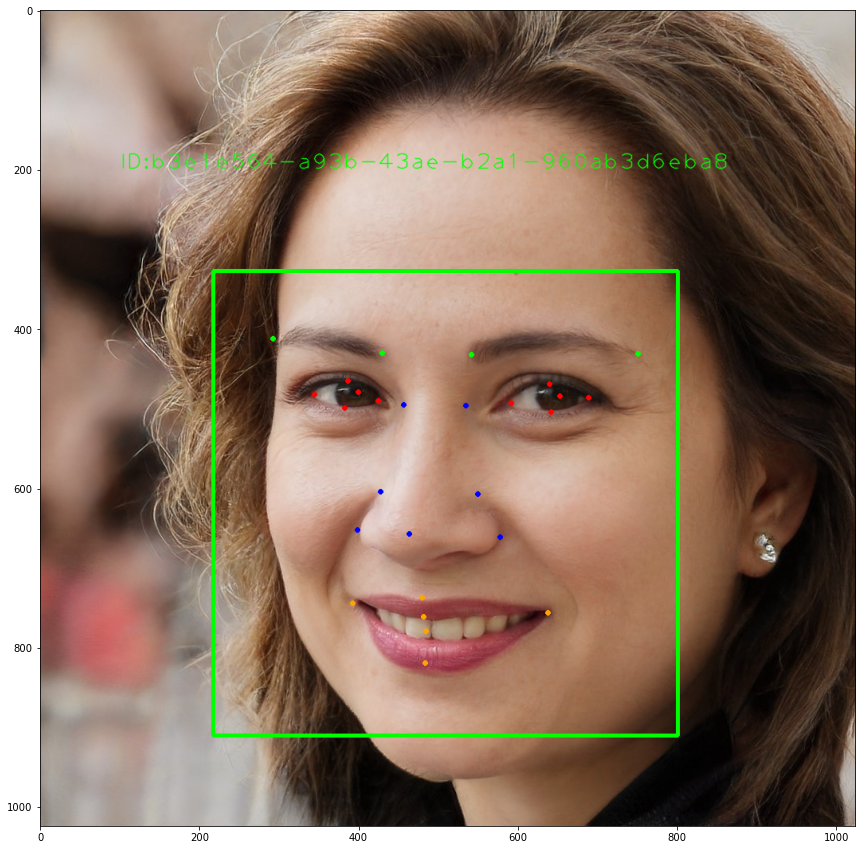

In [40]:
imageview(result_image)

## Distances calculation

In [41]:
pixels_per_metric = float(0.3) # Need for calibration (a common object can be used)

def pixel_to_mminch(pixels):
    mm = pixels_per_metric * pixels
    inches = mm / 25.4
    print(pixels, 'pixels', ' => ', mm, 'mm', 'or', inches, 'inches')
    return mm

In [42]:
distancebetweeneyes_pix=abs(noseRightAlarTopx-noseLeftAlarTopx)
print('Distance between Eyes:')
distancebetweeneyes_mm=pixel_to_mminch(distancebetweeneyes_pix)

Distance between Eyes:
122.19999999999993 pixels  =>  36.659999999999975 mm or 1.4433070866141724 inches


In [43]:
pupildistance_pix=abs(pupilLeftx-pupilRightx)
print('Distance between Pupils:')
pupildistance_mm=pixel_to_mminch(pupildistance_pix)

Distance between Pupils:
252.50000000000006 pixels  =>  75.75000000000001 mm or 2.98228346456693 inches


In [44]:
EyeLeftHeight=abs(eyeLeftTopy-eyeLeftBottomy)
EyeLeftWidth=abs(eyeLeftInnerx-eyeLeftOuterx)
EyeLeftSurface_pix=EyeLeftHeight*EyeLeftWidth/2

EyeRightHeight=abs(eyeRightTopy-eyeRightBottomy)
EyeRightWidth=abs(eyeRightInnerx-eyeRightOuterx)
EyeRightSurface_pix=EyeRightHeight*EyeRightWidth/2

In [45]:
print('Eye Left Height')
pixel_to_mminch(EyeLeftHeight)

Eye Left Height
34.0 pixels  =>  10.2 mm or 0.4015748031496063 inches


10.2

In [46]:
print('Eye Left Width')
pixel_to_mminch(EyeLeftWidth)

Eye Left Width
79.80000000000001 pixels  =>  23.94 mm or 0.9425196850393702 inches


23.94

In [47]:
print('Eye Right Height')
pixel_to_mminch(EyeRightHeight)

Eye Right Height
35.599999999999966 pixels  =>  10.679999999999989 mm or 0.4204724409448815 inches


10.679999999999989

In [48]:
print('Eye Right Width')
pixel_to_mminch(EyeRightWidth)

Eye Right Width
96.80000000000007 pixels  =>  29.04000000000002 mm or 1.1433070866141741 inches


29.04000000000002

In [49]:
print('Eye Left Surface')
pixel_to_mminch(EyeLeftSurface_pix)

Eye Left Surface
1356.6000000000001 pixels  =>  406.98 mm or 16.022834645669292 inches


406.98

In [50]:
print('Eye Right Surface')
pixel_to_mminch(EyeRightSurface_pix)

Eye Right Surface
1723.0399999999995 pixels  =>  516.9119999999998 mm or 20.350866141732276 inches


516.9119999999998

In [51]:
data = {
'Image': [image_file],
'ID': [faceid],
'Age': [age],
'Gender':  [gender],
'Sentiment': [topsentiment],
}
df = pd.DataFrame(data)
#df = df.T
df.head()

Image                                    ID   Age  Gender  Sentiment
0  test1.jpg  b3e1e564-a93b-43ae-b2a1-960ab3d6eba8  32.0  female  happiness

In [52]:
df.to_csv("AzureFaceResults.csv")

## Mask Detection

In [53]:
#imagefile='https://th.bing.com/th/id/OIP.fAwb_GEDeZo5peIJud2XQgHaE7?pid=ImgDet&rs=1'
imagefile='https://th.bing.com/th/id/R.bfd353404f409e29d7a0c14f99cf8956?rik=Nadfi%2fXyjivjJA&pid=ImgRaw&r=0'
#imagefile='https://cdn-s-www.bienpublic.com/images/40BE6284-007B-4890-BE61-7EA6298E8134/NW_raw/jean-paul-belmondo-pleure-son-quot-ami-quot-jean-pierre-marielle-quot-j-etais-son-ombre-il-etait-la-mienne-quot-photo-stephane-de-sakutin-afp-1556196114.jpg'

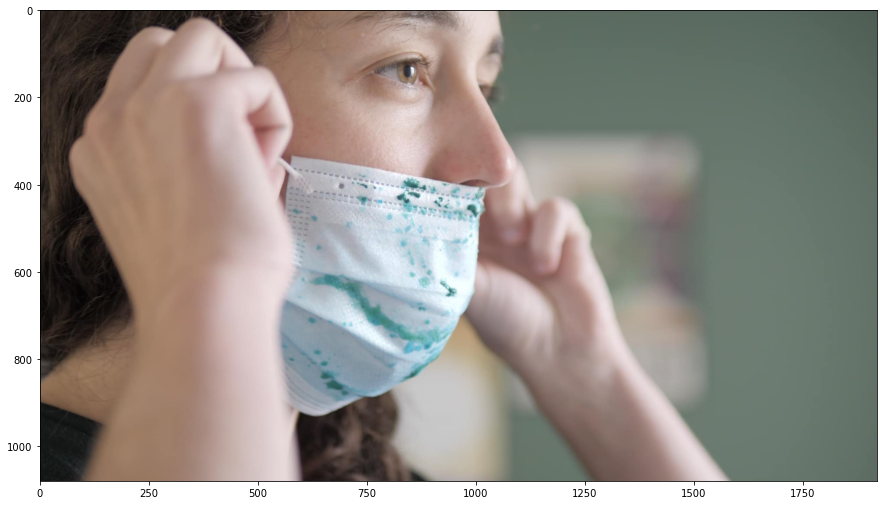

In [54]:
import urllib
image_file = 'testmask.jpg'
urllib.request.urlretrieve(imagefile, filename=image_file)
imagemask = cv2.imread(image_file)
imageview(imagemask)

In [55]:
facemaskapi_url = faceapi_endpoint + '/face/v1.0/detect?detectionmodel=detection_03'
headers = {'Ocp-Apim-Subscription-Key': faceapi_key }
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'mask',
}
response = requests.post(facemaskapi_url, params=params, headers=headers, json={"url": imagefile})
resp=response.json()
resp

[{'faceId': '9c984797-45a1-48c2-8c65-1851ebe5857a',
  'faceRectangle': {'top': 36, 'left': 441, 'width': 702, 'height': 801},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': False}}}]

In [56]:
for resps in resp:
    mask = resp[0]['faceAttributes']['mask']
mask

{'type': 'faceMask', 'noseAndMouthCovered': False}

In [57]:
maskon=mask['type']
nosemouthcovered=mask['noseAndMouthCovered']

if maskon == 'faceMask':
    if nosemouthcovered == True:
        msg = 'OK! This person is wearing a mask and nose & mouth are covered'
        color = (0,128,0)
    if nosemouthcovered == False:
        msg='Not OK! This person is wearing a mask but nose & mouth are not covered'
        color = (0, 165, 255)
if maskon != 'faceMask':
    msg='Not OK! This person is not wearing a mask'
    color = (0, 0, 255)

print(msg)

Not OK! This person is wearing a mask but nose & mouth are not covered


In [58]:
cv2.putText(imagemask, msg, (20, 50), cv2.FONT_HERSHEY_PLAIN,2, color, 2, cv2.LINE_AA)
cv2.imwrite("mask.jpg", imagemask)

True

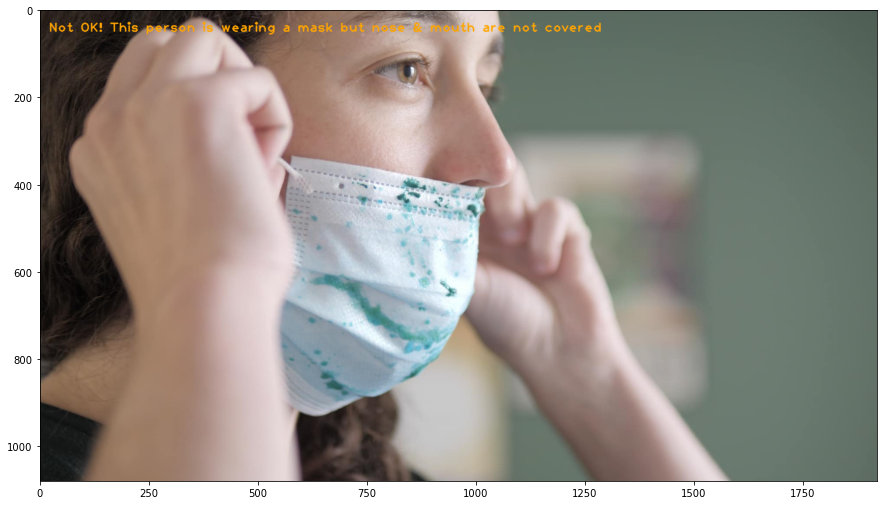

In [59]:
imageview(imagemask)